In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [6]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)
print(X.shape, Y.shape)

(500, 2) (500,)


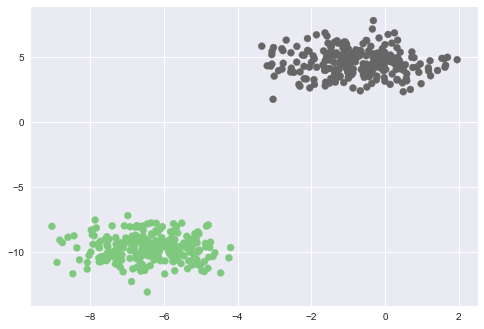

In [7]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and Helper Function

In [8]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [9]:
# Work for single value
print(sigmoid(4))

# Work for np array only
z = np.array([1,2,3,4,5])
print(sigmoid(z))

0.9820137900379085
[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


## Implement Perceptron Learning Algo
<ul>
<li>Learn the weights</li>
<li>Reduce the Loss</li>
<li>Make the Predictions</li>    
</ul>

In [10]:
def predict(X,weights):
    """X-> m*(n+1) matrix, W-> (n+1,) vector
       y = x0.theta0 + x1.theta1 + x2.theta2
       Pred => h(y) = sigmoid(y)
       # O/P - (m,) for I/P X - (m,n+1) and W - (n+1,)
       else for single example, it will be float value.
    """
    z = np.dot(X,weights)
    prediction = sigmoid(z)
    return prediction

In [11]:
def loss(X,Y,weights):
    """Binary Cross Entropy
       Loss Fn = Sum for all example m {( Yi.log(Yi_) + (1-Yi).log(1-Yi_) )}
       Yi = actual value of example Xi
       Yi_ = predicted value of example Xi
       we take mean of loss of examples by dividing total loss of all examples by total no of examples
       np.mean() - gives mean directly
       # O/P - (m,) for I/P X - (m,n+1), Y- (m,) and W - (n+1,)
       else for single example, it will be float value.
    """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [12]:
def update(X,Y,weights,learning_rate):
    """Perform weight update for 1 epoch
       # O/P - (n+1,) for I/P X - (m,n+1), Y- (m,), W - (n+1,) and learning_rate - constant float
       even for single example, it will be same (n+1,)
       Weight Update- d(Loss Fn)/dWj = (Y - Y_).Xj for jth weight
       we are taking -ve of update rule, i.e, Gradient Descent 
    """
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y) # (n+1,), but it contains sum of dw of all examples, so we need to take mean 
                            # of it by dividing it by total no of examples in i/p i.e, m 
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [13]:
def train(X,Y,learning_rate=0.8,maxEpochs=100):
    
    # Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Init Weights
    weights = np.zeros(X.shape[1]) # n+1 entries
    
    for epoch in range(maxEpochs):
        # Iterate over all epochs and make update
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
            
    return weights 
    
    

In [14]:
weights = train(X,Y, maxEpochs=1000)

Epoch 0 Loss 0.0005
Epoch 10 Loss 0.0004
Epoch 20 Loss 0.0004
Epoch 30 Loss 0.0004
Epoch 40 Loss 0.0004
Epoch 50 Loss 0.0004
Epoch 60 Loss 0.0004
Epoch 70 Loss 0.0004
Epoch 80 Loss 0.0003
Epoch 90 Loss 0.0003
Epoch 100 Loss 0.0003
Epoch 110 Loss 0.0003
Epoch 120 Loss 0.0003
Epoch 130 Loss 0.0003
Epoch 140 Loss 0.0003
Epoch 150 Loss 0.0003
Epoch 160 Loss 0.0003
Epoch 170 Loss 0.0003
Epoch 180 Loss 0.0003
Epoch 190 Loss 0.0003
Epoch 200 Loss 0.0002
Epoch 210 Loss 0.0002
Epoch 220 Loss 0.0002
Epoch 230 Loss 0.0002
Epoch 240 Loss 0.0002
Epoch 250 Loss 0.0002
Epoch 260 Loss 0.0002
Epoch 270 Loss 0.0002
Epoch 280 Loss 0.0002
Epoch 290 Loss 0.0002
Epoch 300 Loss 0.0002
Epoch 310 Loss 0.0002
Epoch 320 Loss 0.0002
Epoch 330 Loss 0.0002
Epoch 340 Loss 0.0002
Epoch 350 Loss 0.0002
Epoch 360 Loss 0.0002
Epoch 370 Loss 0.0002
Epoch 380 Loss 0.0002
Epoch 390 Loss 0.0002
Epoch 400 Loss 0.0002
Epoch 410 Loss 0.0002
Epoch 420 Loss 0.0002
Epoch 430 Loss 0.0002
Epoch 440 Loss 0.0002
Epoch 450 Loss 0.0002

In [15]:
 def getPredictions(X_Test,weights,labels=True):
        
        if X_Test.shape[1] != weights.shape[0]:
            ones = np.ones((X_Test.shape[0],1))
            X_Test = np.hstack((ones,X_Test))
            
        probs = predict(X_Test,weights)
        
        if not labels:
            return probs
        else:
            labels = np.zeros(probs.shape)
            labels[probs>=0.5] = 1
            return labels

In [16]:
x1 = np.linspace(-8,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

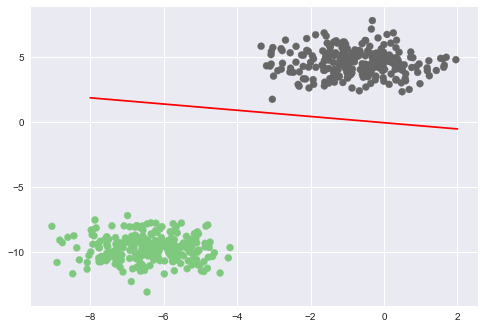

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,color='red')
plt.show()

In [18]:
# Find accuracy
Y_ = getPredictions(X,weights,labels=True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

1.0


## Generate Non Linear Data

In [19]:
X,Y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=True)

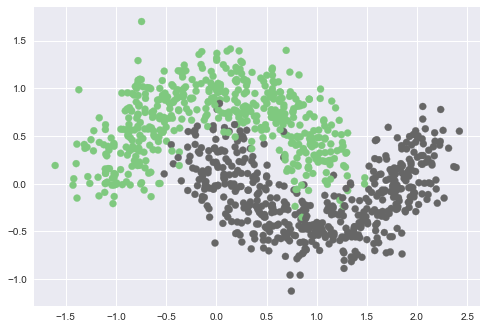

In [20]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [21]:
weights = train(X,Y, maxEpochs=1000)

Epoch 0 Loss 0.6234
Epoch 10 Loss 0.4134
Epoch 20 Loss 0.3672
Epoch 30 Loss 0.3457
Epoch 40 Loss 0.3327
Epoch 50 Loss 0.3239
Epoch 60 Loss 0.3175
Epoch 70 Loss 0.3128
Epoch 80 Loss 0.3091
Epoch 90 Loss 0.3063
Epoch 100 Loss 0.3041
Epoch 110 Loss 0.3023
Epoch 120 Loss 0.3009
Epoch 130 Loss 0.2997
Epoch 140 Loss 0.2988
Epoch 150 Loss 0.2980
Epoch 160 Loss 0.2973
Epoch 170 Loss 0.2968
Epoch 180 Loss 0.2963
Epoch 190 Loss 0.2959
Epoch 200 Loss 0.2956
Epoch 210 Loss 0.2953
Epoch 220 Loss 0.2951
Epoch 230 Loss 0.2949
Epoch 240 Loss 0.2947
Epoch 250 Loss 0.2946
Epoch 260 Loss 0.2944
Epoch 270 Loss 0.2943
Epoch 280 Loss 0.2942
Epoch 290 Loss 0.2941
Epoch 300 Loss 0.2941
Epoch 310 Loss 0.2940
Epoch 320 Loss 0.2940
Epoch 330 Loss 0.2939
Epoch 340 Loss 0.2939
Epoch 350 Loss 0.2938
Epoch 360 Loss 0.2938
Epoch 370 Loss 0.2938
Epoch 380 Loss 0.2938
Epoch 390 Loss 0.2937
Epoch 400 Loss 0.2937
Epoch 410 Loss 0.2937
Epoch 420 Loss 0.2937
Epoch 430 Loss 0.2937
Epoch 440 Loss 0.2937
Epoch 450 Loss 0.2937

In [22]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

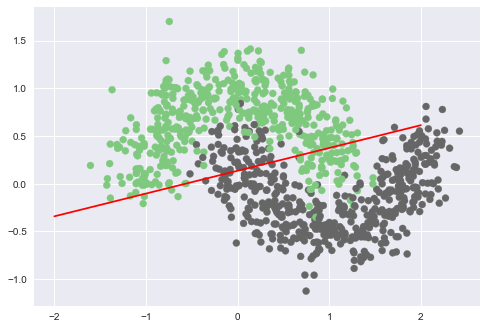

In [23]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,color='red')
plt.show()

In [24]:
# Find accuracy
Y_ = getPredictions(X,weights,labels=True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

0.869
